In [6]:
from matplotlib import pyplot as plt
import numpy as np
import json

In [40]:
data = dict([
    ('ResNet152', './results/nn-from-resnet152-moma-artworks-1000--2018-12-26-09-54-07.npy.json'),
    ('DenseNet', './results/nn-from-densenet-moma-artworks-1000--2018-12-26-09-56-26.npy.json'),
    ('VGG16', './results/nn-from-vgg16-moma-artworks-1000--2018-12-26-10-01-39.npy.json')
])


# get data filter only original artworks
# compute precision recall at (1, 3, 5)

In [108]:
def get_id(path):
    return path.split('/')[-1].split('.')[0]

def get_stats(path, k=3, max_rel_items=5, epsilon=np.finfo(float).eps):
    with open(path,'r') as f:
        dd = json.load(f)

        num_relevant_items = []
        for idx, item in enumerate(dd[:10]):
            id_prefix = '%s--' % get_id(item['artwork']['image'])

            sim_ids = list(filter(lambda s: id_prefix in get_id(s['image']) , item['sims'][:k]))


            num_relevant_items.append(float(len(sim_ids)))
        num_relevant_items = np.array(num_relevant_items)
        print('computing stats from %d items' % num_relevant_items.shape[0])
        precision = num_relevant_items / k
        recall = num_relevant_items / max_rel_items
        f1 = 2*((precision*recall)/(precision+recall+epsilon))
    return (np.mean(precision), np.mean(recall), np.mean(f1)), (np.std(precision), np.std(recall), np.std(f1))
get_stats(data['ResNet152'])

computing stats from 10 items


((0.7333333333333333, 0.44000000000000006, 0.5499999999999998),
 (0.2, 0.11999999999999997, 0.14999999999999994))

In [109]:
kk = [1, 3, 5]

def get_all_stats():
    stats = {}
    for dk, v in data.items():
        m = np.zeros((3, 3))
        s = np.zeros((3, 3))
        for i, k in enumerate(kk):
            st = get_stats(v, k=k)
            m[i, :] = st[0]
            s[i, :] = st[1]
        stats[dk] = {
            'mean': m,
            'std': s
        }
    return stats

stats = get_all_stats()

computing stats from 10 items
computing stats from 10 items
computing stats from 10 items
computing stats from 10 items
computing stats from 10 items
computing stats from 10 items
computing stats from 10 items
computing stats from 10 items
computing stats from 10 items


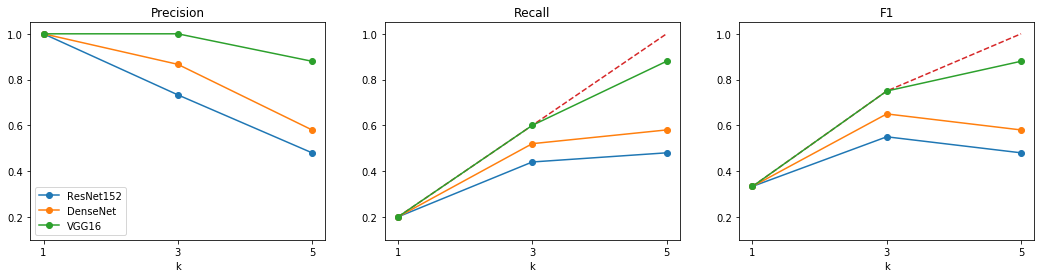

In [111]:

titles = [
    'Precision',
    'Recall',
    'F1'
]
plt.figure(figsize=(18, 4))

for idx, k in enumerate(kk):
    plt.subplot(1, 3, idx+1)
    for dk in data.keys():
#         plt.plot(kk, , 'o-', label=dk)
        plt.errorbar(kk, stats[dk]['mean'][:, idx], fmt='o-', label=dk)

    if idx == 0:
        plt.legend()
    elif idx == 1:
        plt.plot(kk, np.array(kk)/5, '--', label=dk)
    elif idx == 2:
        max_f1 = map(lambda r: 2*((1.0*r)/(1.0+r)),  np.array(kk)/5)
        plt.plot(kk, list(max_f1), '--', label=dk)


    plt.ylim((0.1, 1.05))
    plt.xticks(kk, kk)
    plt.xlabel('k')
    plt.title(titles[idx])